# **FIS**

In [24]:
import numpy as np
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data_path = "/content/drive/MyDrive/Colab Notebooks/ADM_Project/GA/outputGA.csv"
pd_data = pd.read_csv(data_path)
pd_data.head()

,Relative Velocity km per sec,Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Orbital Period,Mean Anomaly,hazardous
0,6.115834,17,5,0.025282,0.425549,609.599786,264.837533,1
1,18.113985,21,3,0.186935,0.351674,425.869294,173.741112,0
2,7.590711,22,0,0.043058,0.348248,643.580228,292.893654,1
3,11.173875,7,6,0.005512,0.216578,514.082140,68.741007,0
4,9.840831,25,1,0.034798,0.210448,495.597821,135.142133,1


In [27]:
data_path = "/content/drive/MyDrive/Colab Notebooks/ADM_Project/GA/disc5bin_edges.csv"
bin_range = pd.read_csv(data_path)
bin_range

,0,1,2,3,4,5
0,0.335504,9.195153,18.054801,26.914450,35.774098,44.633747
1,1.000000,123.000000,245.000000,367.000000,489.000000,611.000000
2,0.000000,1.800000,3.600000,5.400000,7.200000,9.000000
3,0.000002,0.095580,0.191158,0.286735,0.382313,0.477891
4,0.007522,0.198070,0.388618,0.579165,0.769713,0.960261
5,176.557161,975.691998,1774.826834,2573.961670,3373.096507,4172.231343
6,0.003191,71.986151,143.969111,215.952071,287.935031,359.917991


In [28]:
cols = list(pd_data.columns)

In [29]:
cols

['Relative Velocity km per sec',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Eccentricity',
 'Orbital Period',
 'Mean Anomaly',
 'hazardous']

In [30]:
cols = cols[:-1]
print(len(cols))

7


In [31]:
cols

['Relative Velocity km per sec',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Eccentricity',
 'Orbital Period',
 'Mean Anomaly']

In [32]:
fuzzy_var = {}

In [33]:

for i,j in zip(cols, range(len(bin_range))):
  fuzzy_var[j] = ctrl.Antecedent(np.arange(pd_data[i].min(), pd_data[i].max(), (pd_data[i].max()-pd_data[i].min())/5000), i)
  fuzzy_var[j].automf(5, names = ['0','1', '2', '3', '4'])


In [34]:
"""
for i,j in zip(cols, range(len(bin_range))):
  l = list(bin_range.iloc[j])
  fuzzy_var[j] = ctrl.Antecedent(np.arange(pd_data[i].min(), pd_data[i].max(), (pd_data[i].max()-pd_data[i].min())/pd_data.shape[0]), i)
  fuzzy_var[j]['0'] = fuzz.trimf(fuzzy_var[j].universe, [l[0], l[0], (l[1] + l[2]) / 2])
  fuzzy_var[j]['1'] = fuzz.trimf(fuzzy_var[j].universe, [(l[0] + l[1]) / 2, (l[1] + l[2]) / 2, (l[2] + l[3]) / 2])
  fuzzy_var[j]['2'] = fuzz.trimf(fuzzy_var[j].universe, [(l[1] + l[2]) / 2, (l[2] + l[3]) / 2, (l[3] + l[4]) / 2])
  fuzzy_var[j]['3'] = fuzz.trimf(fuzzy_var[j].universe, [(l[2] + l[3]) / 2, (l[3] + l[4]) / 2, (l[4] + l[5]) / 2])
  fuzzy_var[j]['4'] = fuzz.trimf(fuzzy_var[j].universe, [(l[3] + l[4]) / 2, l[5], l[5]])

"""

"\nfor i,j in zip(cols, range(len(bin_range))):\n  l = list(bin_range.iloc[j])\n  fuzzy_var[j] = ctrl.Antecedent(np.arange(pd_data[i].min(), pd_data[i].max(), (pd_data[i].max()-pd_data[i].min())/pd_data.shape[0]), i)\n  fuzzy_var[j]['0'] = fuzz.trimf(fuzzy_var[j].universe, [l[0], l[0], (l[1] + l[2]) / 2])\n  fuzzy_var[j]['1'] = fuzz.trimf(fuzzy_var[j].universe, [(l[0] + l[1]) / 2, (l[1] + l[2]) / 2, (l[2] + l[3]) / 2])\n  fuzzy_var[j]['2'] = fuzz.trimf(fuzzy_var[j].universe, [(l[1] + l[2]) / 2, (l[2] + l[3]) / 2, (l[3] + l[4]) / 2])\n  fuzzy_var[j]['3'] = fuzz.trimf(fuzzy_var[j].universe, [(l[2] + l[3]) / 2, (l[3] + l[4]) / 2, (l[4] + l[5]) / 2])\n  fuzzy_var[j]['4'] = fuzz.trimf(fuzzy_var[j].universe, [(l[3] + l[4]) / 2, l[5], l[5]])\n\n"

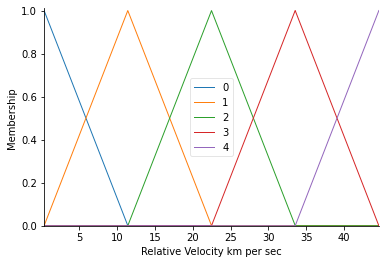

In [35]:
fuzzy_var[0].view()

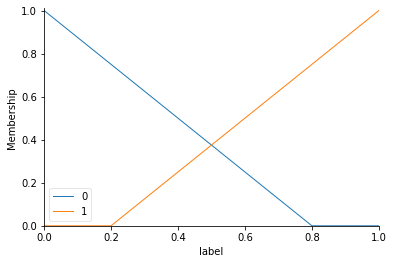

In [36]:
label = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'label', defuzzify_method='mom')
label['0'] = fuzz.trimf(label.universe,[0,0,0.8])
label['1'] = fuzz.trimf(label.universe,[0.2,1,1])
label.view()

In [37]:
for i in range(len(cols)):
  print(i, cols[i])

0 Relative Velocity km per sec
1 Orbit ID
2 Orbit Uncertainity
3 Minimum Orbit Intersection
4 Eccentricity
5 Orbital Period
6 Mean Anomaly


In [38]:
rule1 = ctrl.Rule( (fuzzy_var[3]['1'] | fuzzy_var[3]['2'] | fuzzy_var[3]['3'] | fuzzy_var[3]['4']), label['0'])
rule2 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['2'] | fuzzy_var[2]['3'] | fuzzy_var[2]['4']) & (fuzzy_var[4]['0'] | fuzzy_var[4]['1'] | fuzzy_var[4]['2'] | fuzzy_var[4]['3']), label['0'] )
rule3 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['4']) & (fuzzy_var[4]['4']), label['0'] )
rule4 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['0'] | fuzzy_var[2]['1']) & ( fuzzy_var[4]['0'] | fuzzy_var[4]['1']) & ( fuzzy_var[1]['0'] ), label['0'] )
rule5 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['2'] | fuzzy_var[2]['3'] | fuzzy_var[2]['4']) & ( fuzzy_var[4]['4']), label['1'] )
rule6 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['0'] | fuzzy_var[2]['1']) & (fuzzy_var[4]['2'] | fuzzy_var[4]['3'] | fuzzy_var[4]['4']), label['1'] )
rule7 = ctrl.Rule( (fuzzy_var[3]['0'] ) & (fuzzy_var[2]['0'] | fuzzy_var[2]['1']) & (fuzzy_var[4]['0'] | fuzzy_var[4]['1']) & ( fuzzy_var[1]['1'] | fuzzy_var[1]['2'] | fuzzy_var[1]['3'] | fuzzy_var[1]['4']), label['1']  )

In [39]:
rule7

IF ((Minimum Orbit Intersection[0] AND (Orbit Uncertainity[0] OR Orbit Uncertainity[1])) AND (Eccentricity[0] OR Eccentricity[1])) AND (((Orbit ID[1] OR Orbit ID[2]) OR Orbit ID[3]) OR Orbit ID[4]) THEN label[1]
	AND aggregation function : fmin
	OR aggregation function  : fmax

In [40]:
label_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [41]:
FIS = ctrl.ControlSystemSimulation(label_ctrl)

In [42]:
FIS.input

Minimum Orbit Intersection : None
Orbit Uncertainity : None
Eccentricity : None
Orbit ID : None

In [43]:
type(FIS.input)

skfuzzy.control.controlsystem._InputAcceptor

In [44]:
l = ['Orbit Uncertainity', 'Minimum Orbit Intersection',  'Eccentricity', 'Orbit ID']

1
0.8173200189249503


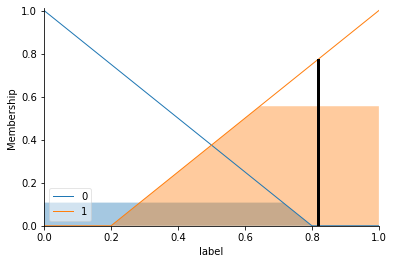

In [45]:
print(pd_data.iloc[22,7])
for i in l:
  FIS.input[i] = pd_data.iloc[22][i]
FIS.compute()
print(FIS.output['label'])
label.view(sim=FIS)

# **Accuracy**

In [47]:
predict = []
for j in range(pd_data.shape[0]):
    pd_data.iloc[j]
    l = ['Orbit Uncertainity', 'Minimum Orbit Intersection',  'Eccentricity', 'Orbit ID']
    for i in l:
      FIS.input[i] = pd_data.iloc[j][i]
    FIS.compute()
    if (FIS.output['label'] < 0.5):
      predict.append(0)
    else:
      predict.append(1)

from sklearn.metrics import accuracy_score
print("Accuracy of Fuzzy Classifier: ",accuracy_score(pd_data['hazardous'], predict))



Accuracy of Fuzzy Classifier:  0.9050565393641988
